In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [ ]:
#READ DATASET

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv',header=None,index_col = 0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df = df[[2,3]].reset_index(drop= True)

In [ ]:
df.columns = ['sentiment','text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
#BASIC ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()
df.dropna(inplace= True)


In [ ]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 2113)

In [ ]:
print(df.shape)
df=df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [ ]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

# prerocessing

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\aravind\appdata\local\temp\pip-req-build-e6bh26hw
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7667 sha256=70b87e0fdd205345a53aab4a1adfb86735def6b2661910220b3966d2c8180bd4
  Stored in directory: C:\Users\Aravind\AppData\Local\Temp\pip-ephem-wheel-cache-eg2e0qtg\wheels\74\fe\05\0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\Aravind\AppData\Local\Temp\pip-req-build-e6bh26hw'


In [ ]:
import preprocess_kgptalkie as ps
df.columns

Index(['sentiment', 'text'], dtype='object')

In [ ]:
df = ps.get_basic_features(df)

In [ ]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

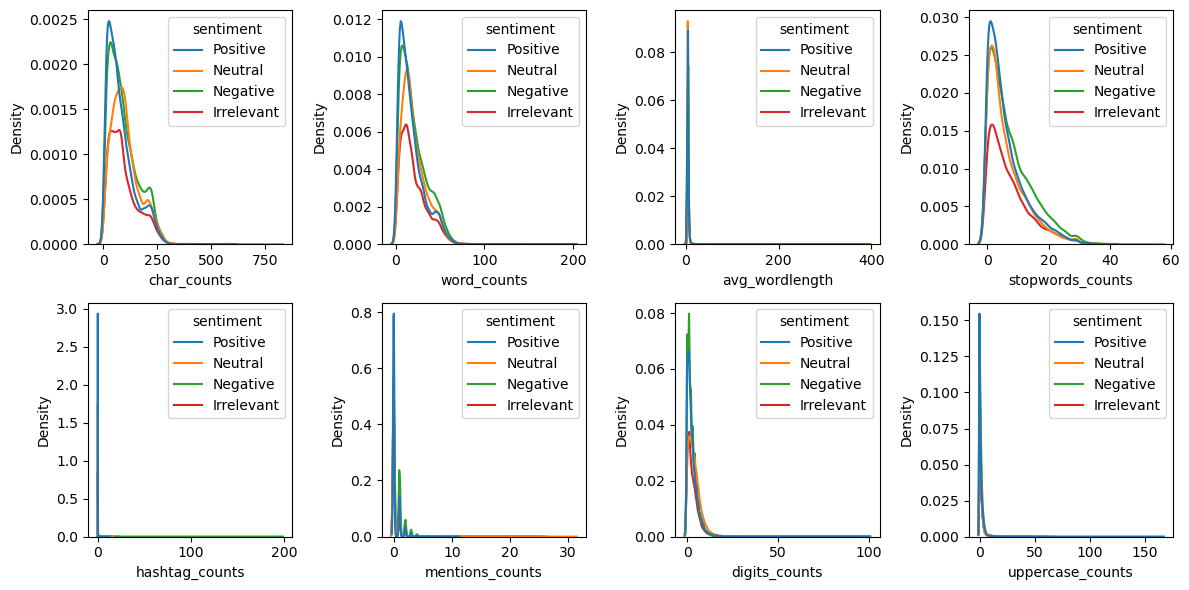

In [ ]:
df.head()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
num_cols=df.select_dtypes(include='number').columns


for index ,col in enumerate(num_cols):
    plt.subplot(2,4 ,index+1)
    sns.kdeplot(data = df,x=col,hue="sentiment",fill= False)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

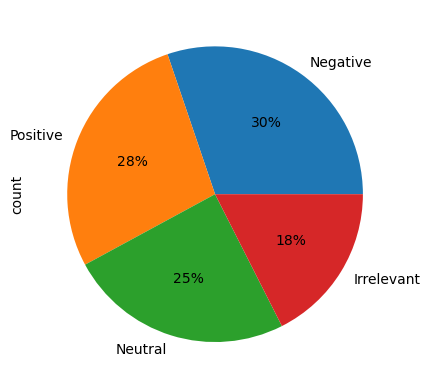

In [ ]:
df['sentiment'].value_counts().plot(kind='pie',autopct="%1.0f%%")

# wordcloud analysis

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

In [ ]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

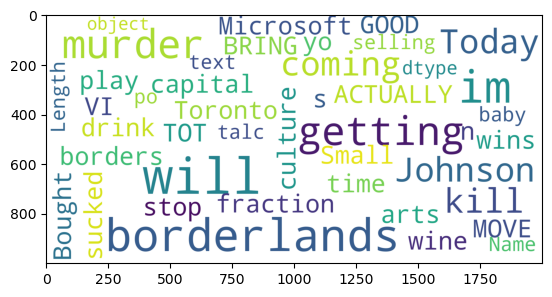

In [ ]:
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(df['text']))
plt.imshow(wordcloud)


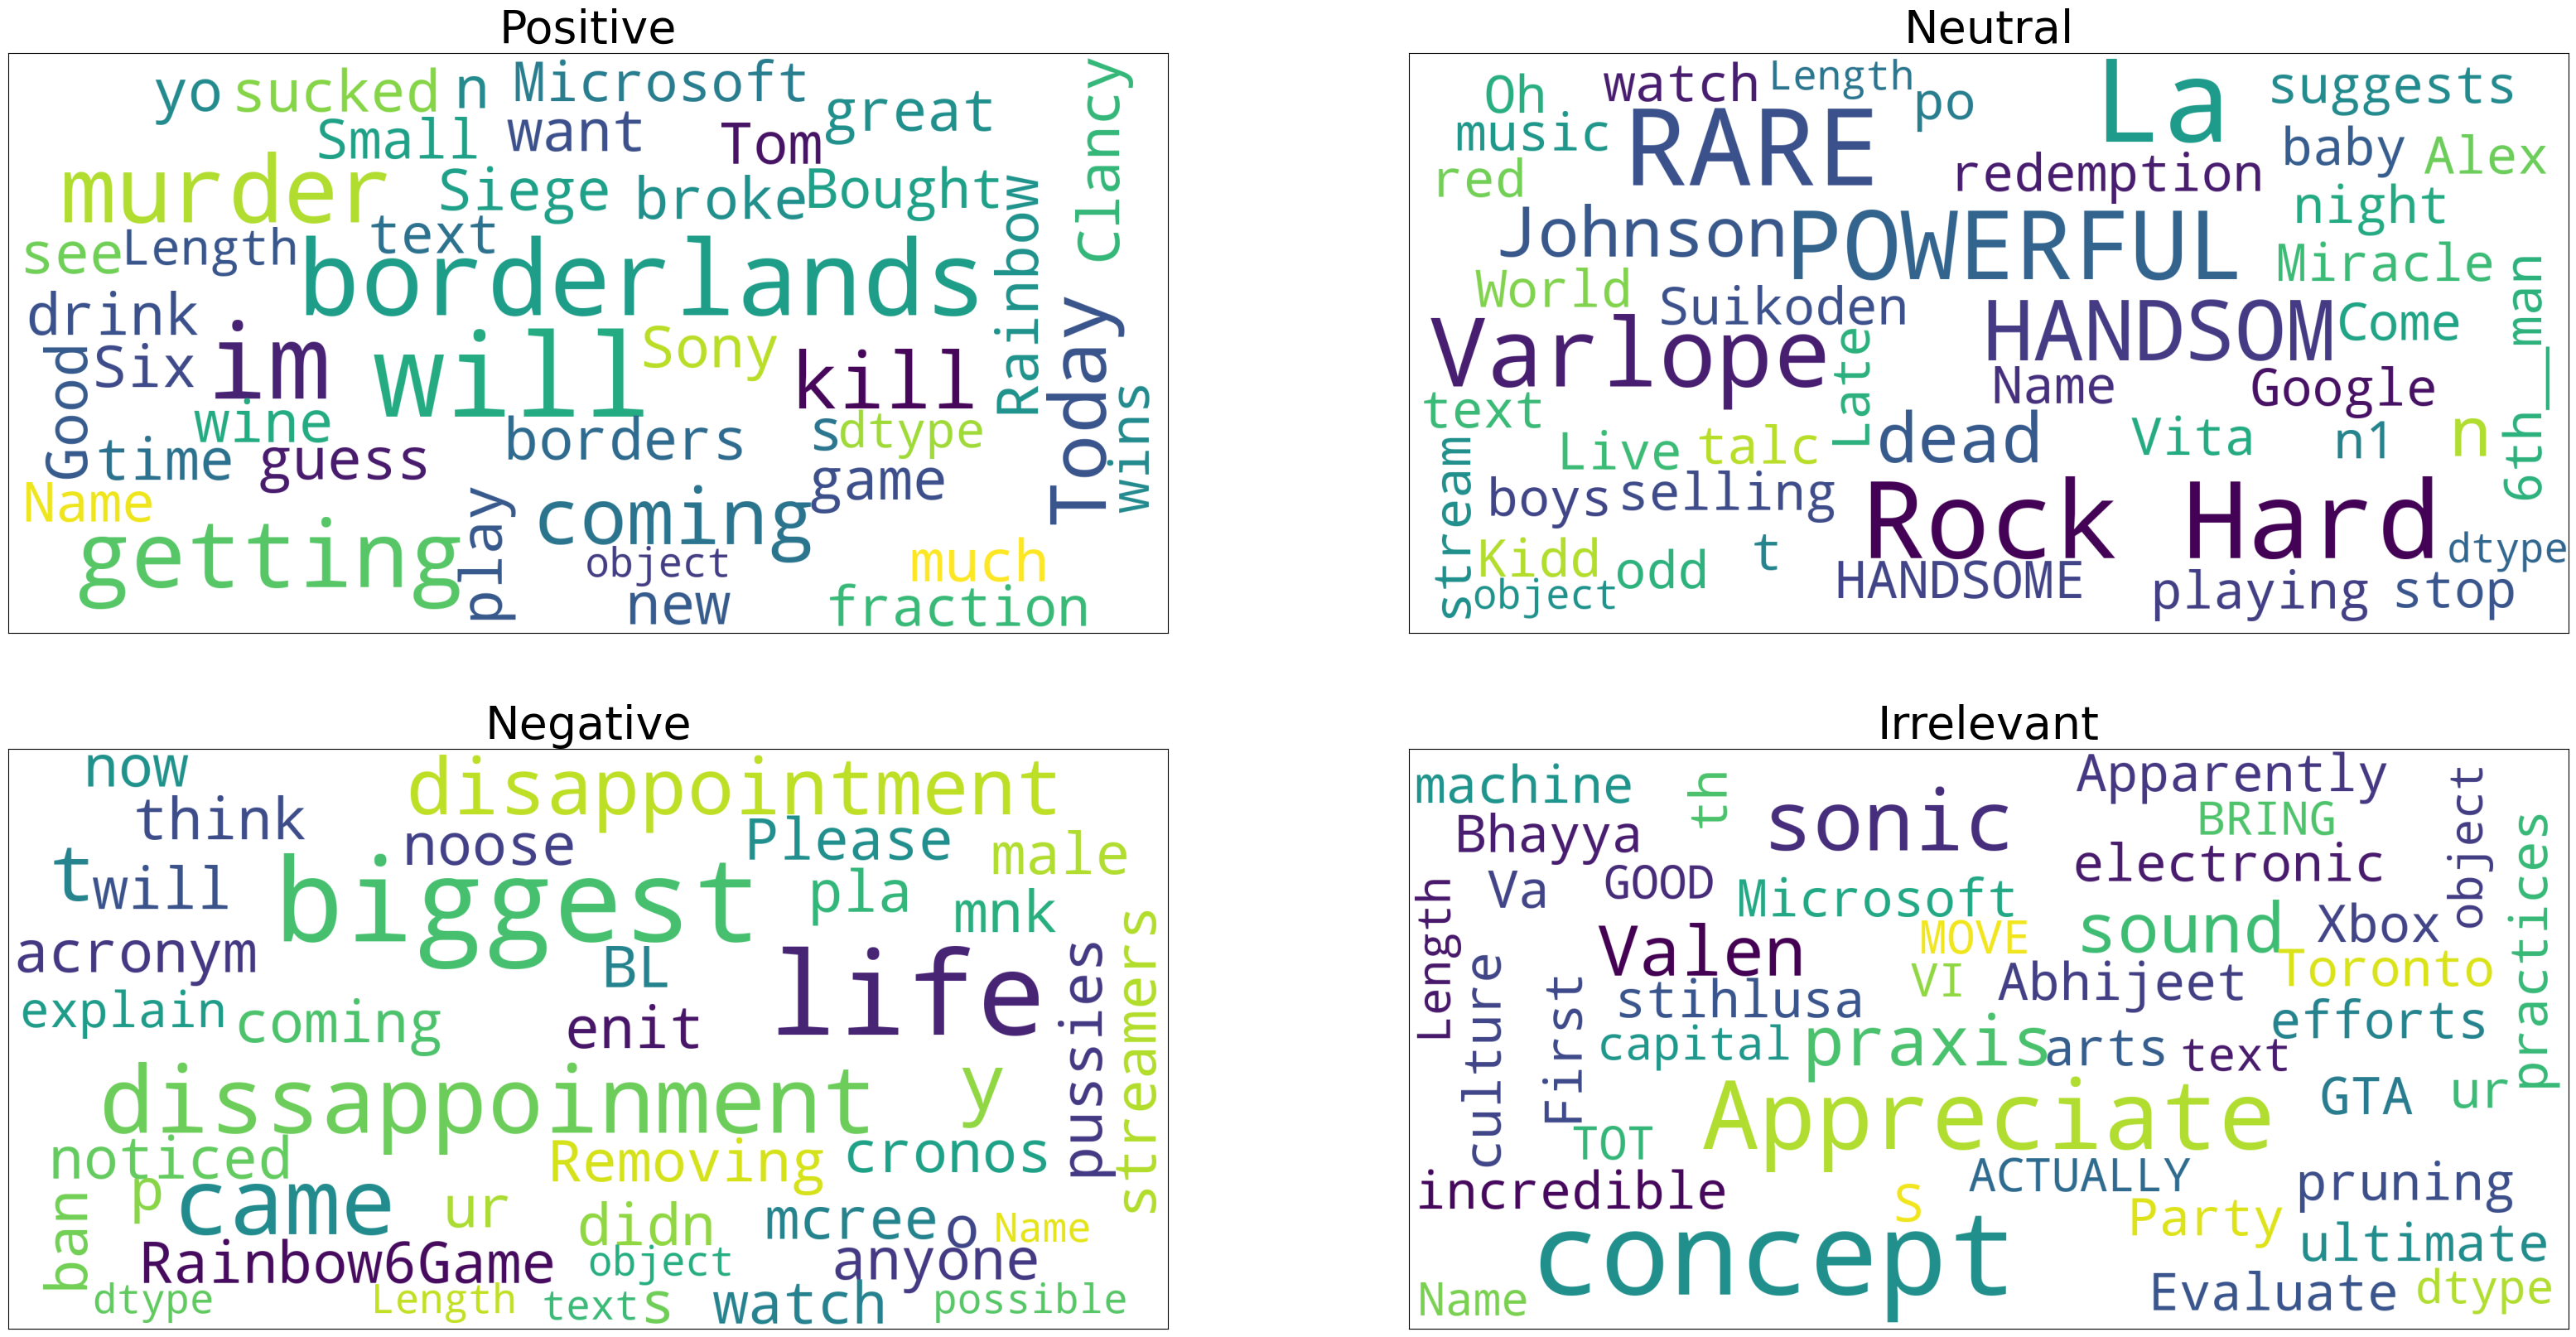

In [ ]:
plt.figure(figsize=(40,20))
for index,sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)

    data = df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(data))

    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent,fontsize=40)

# DATA CLEANING


In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

# train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=0)

In [ ]:
X_train.shape,X_test.shape

((58306,), (14577,))

# MODEL BUILDING AND TESTING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline





In [ ]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [ ]:
# evaluation
from sklearn.metrics import classification_report

Y_pred = clf.predict(X_test)


In [ ]:
print( classification_report
(y_test,Y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.86      0.91      2561
    Negative       0.92      0.96      0.94      4481
     Neutral       0.92      0.92      0.92      3553
    Positive       0.91      0.95      0.93      3982

    accuracy                           0.93     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.93      0.93     14577



In [ ]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9266652946422447


In [ ]:
import pickle

pickle.dump(clf, open('Twitter_sentiment.pkl', 'wb'))

In [ ]:
X_test.tolist()[:20]

['thank god',
 'i dont know why a weird ass district using this wack ass software when we couldve used google classroom',
 '2ksupport nba2k my boy whos new to the game and relies on me to teach him how to play was naughty when creating a ticket to figure out why he left a reply a few time claiming he was banned for boosting again he doesnt even know how to play other than what i show him 12',
 'tristate got the best video we international are in this scene',
 'callofduty is currently an absolute mess',
 'revenge',
 'dell 1 xps 17 9700 graphics review card missing and flickering screen via r dellxps ift tt 2ps3pbw about a whole week straight ago i personally was just playing a console game and the computer was suddenly blue screened with a fatal error indicating a crashed gpu upon rebooting maybe the nvidia gtx was missing link in device',
 'i havent played hearthstone for years but my god this card is as cute as heck picfacebookcom 7lqtncndgl',
 'jnjcares good luck hope sales go before

In [ ]:
clf.predict(['i have done'])

array(['Positive'], dtype=object)